# Benefit of Multiplicative (MPL) Models over Nominal (Nom) Models of Systems
Testing actuator selection and feedback of Nominal and MPL models on simulations of True system

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_nom_vs_mpl, plot_simulation_nom_vs_mpl_1, plot_simulation_nom_vs_mpl_2, actuator_comparison

## Code

In [2]:
test_set = 'System Model 6'
S_True = sys_from_file(test_set + ' True')
S_MPL = sys_from_file(test_set + ' MPL')
S_Nom = sys_from_file(test_set + ' Nominal')

System read from file @ system_model/System Model 6 True.pickle 

System read from file @ system_model/System Model 6 MPL.pickle 

System read from file @ system_model/System Model 6 Nominal.pickle 



In [3]:
ret_sim = simulation_nom_vs_mpl(S_Nom, S_MPL, S_True)

## Output

#### System Models

##### True System

max(abs(eigvals(A)))= 0.9500


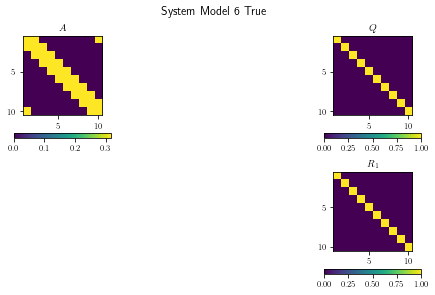

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True)

##### Nominal Model

max(abs(eigvals(A)))= 0.9500


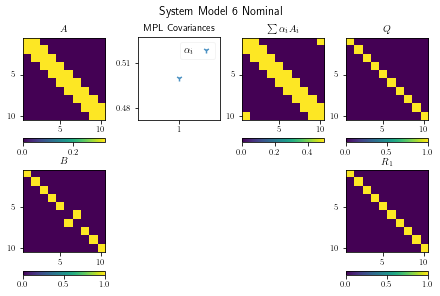

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_nom']['A'])))))
system_display_matrix(ret_sim['system_nom'])

##### Multiplicative Noise Model

max(abs(eigvals(A)))= 0.9500


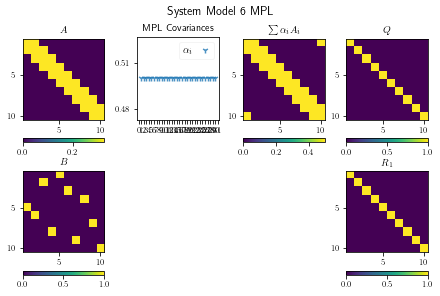

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_mpl']['A'])))))
system_display_matrix(ret_sim['system_mpl'])

#### Simulation - Trajectory, Control Input and Costs

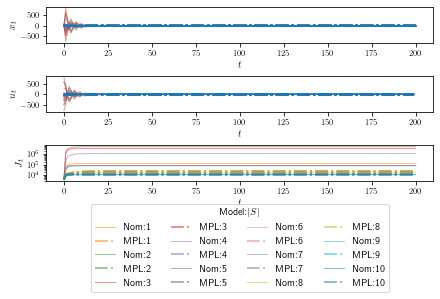

In [7]:
plot_simulation_nom_vs_mpl_1(ret_sim)

#### Actuator set comparison

Control sets are different


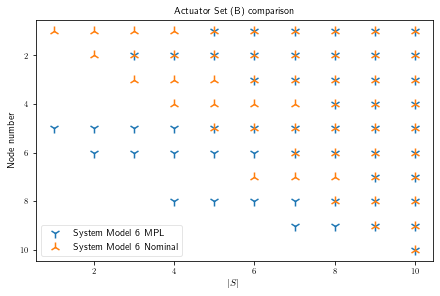

In [8]:
actuator_comparison(ret_sim['system_mpl'], ret_sim['system_nom'], disptext=True, figplt=True);

#### Simulated costs

In [9]:
print('True simulation cost with <___> feedback (4decimal approx)')
for key in ret_sim['T_Nom']['costs']:
    print ("|S|: %s | Nom: %.4f | MPL: %.4f | Diff (Nom-MPL) %.4f (%.4f %% of Nom)" % (key, ret_sim['T_Nom']['costs'][key][-1], ret_sim['T_MPL']['costs'][key][-1], ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1], (ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1])*100/ret_sim['T_Nom']['costs'][key][-1]))

True simulation cost with <___> feedback (4decimal approx)
|S|: 1 | Nom: 136500.4762 | MPL: 26720.2738 | Diff (Nom-MPL) 109780.2025 (80.4248 % of Nom)
|S|: 2 | Nom: 83840.5234 | MPL: 24115.0587 | Diff (Nom-MPL) 59725.4647 (71.2370 % of Nom)
|S|: 3 | Nom: 3691958.2849 | MPL: 17428.3066 | Diff (Nom-MPL) 3674529.9783 (99.5279 % of Nom)
|S|: 4 | Nom: 1223080.9047 | MPL: 14406.8932 | Diff (Nom-MPL) 1208674.0115 (98.8221 % of Nom)
|S|: 5 | Nom: 5587201.0264 | MPL: 13527.8965 | Diff (Nom-MPL) 5573673.1300 (99.7579 % of Nom)
|S|: 6 | Nom: 86014.1828 | MPL: 12910.5329 | Diff (Nom-MPL) 73103.6499 (84.9902 % of Nom)
|S|: 7 | Nom: 85623.6996 | MPL: 12175.3370 | Diff (Nom-MPL) 73448.3626 (85.7804 % of Nom)
|S|: 8 | Nom: 19908.5784 | MPL: 12010.1044 | Diff (Nom-MPL) 7898.4739 (39.6737 % of Nom)
|S|: 9 | Nom: 12924.9748 | MPL: 11837.6983 | Diff (Nom-MPL) 1087.2766 (8.4122 % of Nom)
|S|: 10 | Nom: 11515.6715 | MPL: 11485.3747 | Diff (Nom-MPL) 30.2968 (0.2631 % of Nom)


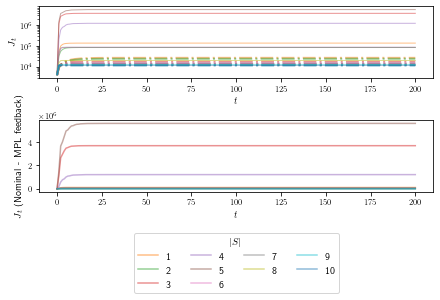

In [10]:
plot_simulation_nom_vs_mpl_2(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
